In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Importing datas
db =pd.read_csv("A:\Advertising.csv")
db

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Analysis

In [21]:
db.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [22]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [23]:
# Checking the NULL values
db.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [24]:
print(db.shape)

(200, 5)


In [25]:
print(db.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [26]:
db.head(15)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [27]:
print(db.dtypes)

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


# Data Visualisation

In [28]:
# Removing unneccesary columns
db = db.drop('Unnamed: 0', axis =1)
db

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


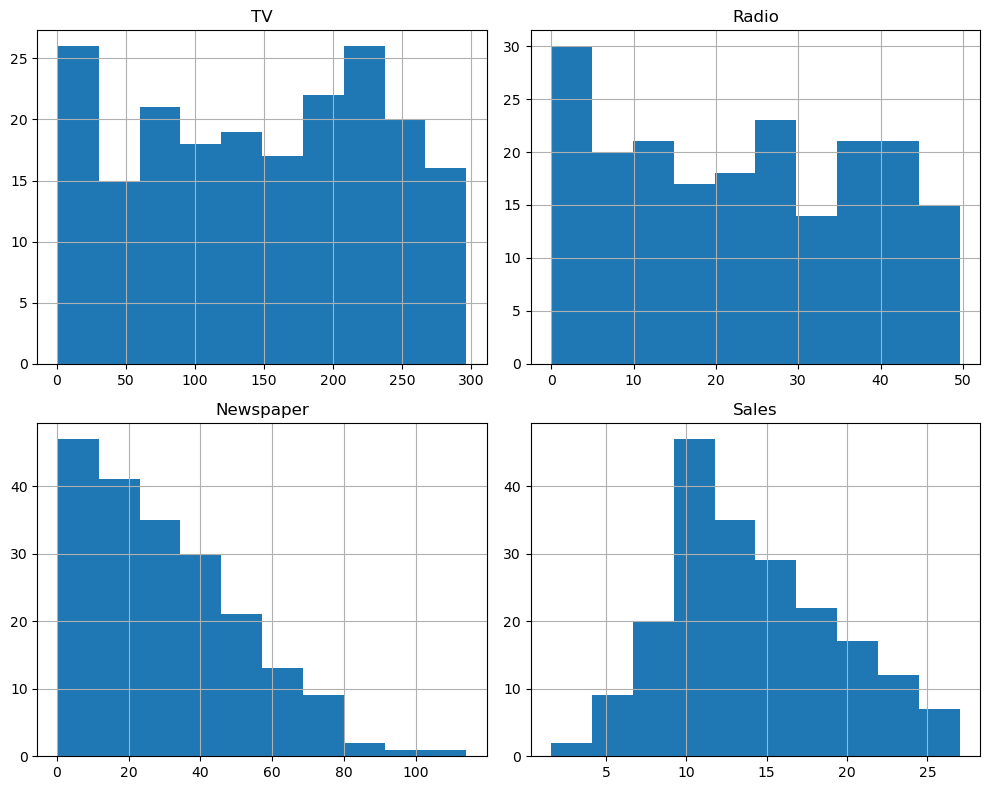

In [29]:
# Plotting HISTOGRAM
db.hist (bins = 10, figsize = (10,8))
plt.tight_layout()
plt.show()

<Axes: >

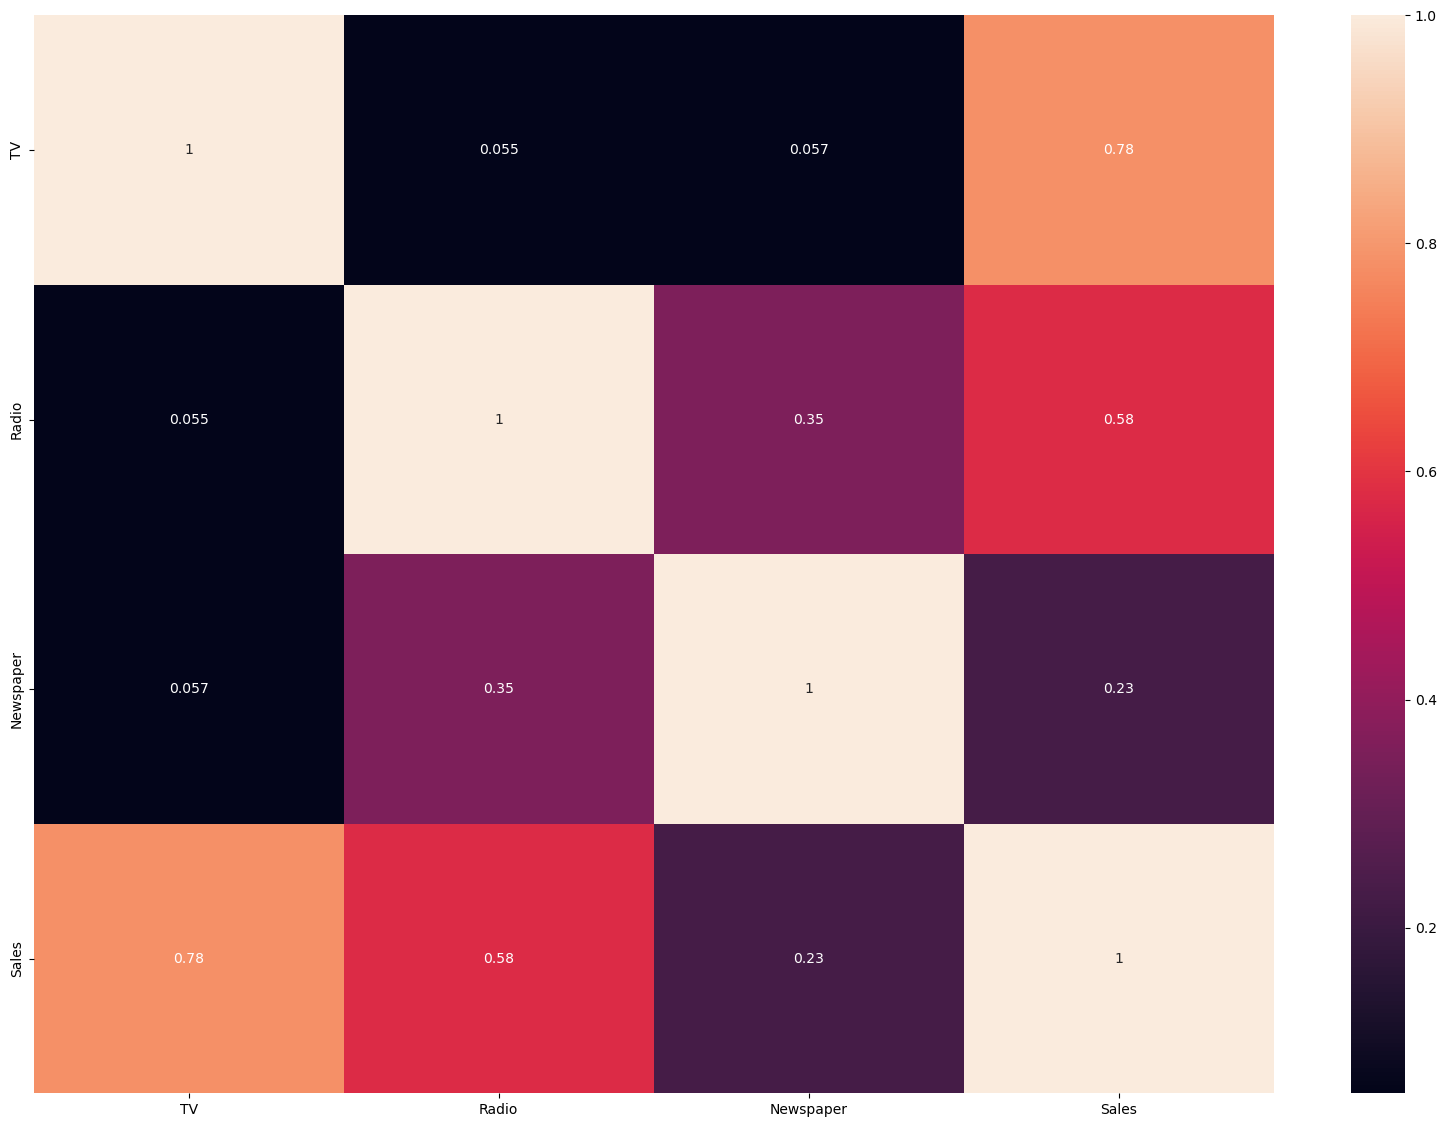

In [30]:
# Plotting HEATMAP
import seaborn as sns
plt.figure( figsize = (20, 14))
sns.heatmap(db.corr(), annot=True)

# Importing Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [32]:
x=db.iloc[:,:-1].values
y=db.iloc[:,-1].values

# Splitting the datasets into training and test sets
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=54)



In [33]:
# Train the model
rf = RandomForestRegressor( n_estimators = 25, random_state = 456)
rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=456)

In [34]:
# Predicting model
y_pred = rf.predict(x_test)
print(y_pred)

[14.112  7.    17.904  6.936 10.608 10.216 19.564  8.732 16.584 11.928
 10.184 12.42  16.976 16.636  8.104 23.048  9.34  14.712 10.22  12.232
 15.612 13.452 15.912 21.844 11.968 13.34   7.72  25.04  10.116 12.376
 19.076 10.636 19.612 22.292 18.36  20.636  8.524 14.192 19.68   7.408]


In [35]:
# Model accuacy
print("\n Random Forest regression mean sq:", mean_squared_error(y_test, y_pred))

print("\n Random Forest Regression  mean absolute error:",mean_absolute_error(y_test, y_pred))

print("\n Random Forest Regression mean absolute percentage error :", mean_absolute_percentage_error(y_test,y_pred))
print("\n Random Forest r2 score:", r2_score(y_test, y_pred))


 Random Forest regression mean sq: 0.6230803999999992

 Random Forest Regression  mean absolute error: 0.6302999999999994

 Random Forest Regression mean absolute percentage error : 0.04682036733127935

 Random Forest r2 score: 0.9761294513259758
